In [2]:
import folium
import geopandas as gpd
from geojson import Point, Feature, FeatureCollection, dump
from shapely.geometry import Point, Polygon
import pandas as pd

long= 8.318000
lat=-69.948000

centerpoint = [long,lat]

xmin= long - 0.014438
ymin= lat - 0.014438
xmax= long + 0.014438
ymax= lat + 0.014438


features = []
polygon = Polygon([[xmin,
		  ymin],
		  [xmin,
		  ymax],
		  [xmax,
		  ymax],
		  [xmin,
		  ymax],
		  [xmin,
		  ymin]])
features.append(Feature(geometry=polygon, properties={"Area": "Atlis"}))
feature_collection = FeatureCollection(features)

with open('Astrid.geojson', 'w') as f:
   dump(feature_collection, f)

In [3]:
m = folium.Map([long, lat], zoom_start=10)
boundsdata = r'C:\Users\mmbos\Class MAterials\GGS-416\sia\Project\atlis.geojson'
folium.GeoJson(boundsdata).add_to(m)

In [4]:
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
api = SentinelAPI('mbossing', 'Iaintdoin12','https://scihub.copernicus.eu/dhus')

footprint = geojson_to_wkt(read_geojson(boundsdata))

In [5]:
products = api.query(footprint,
                     date = ('20100225', '20190227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20),
                     limit=5)

<AxesSubplot:>

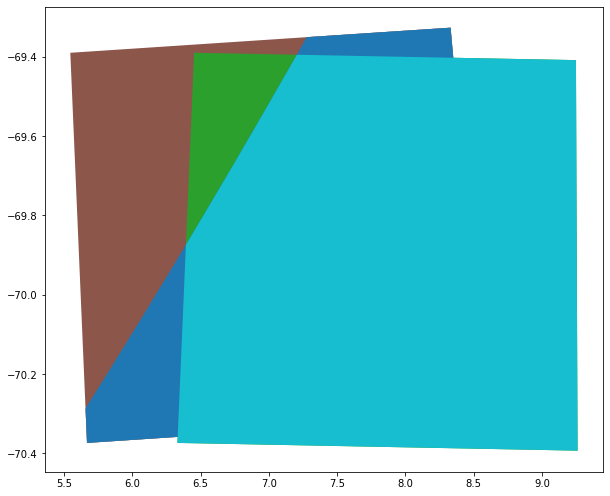

In [16]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None, figsize = (10,10))

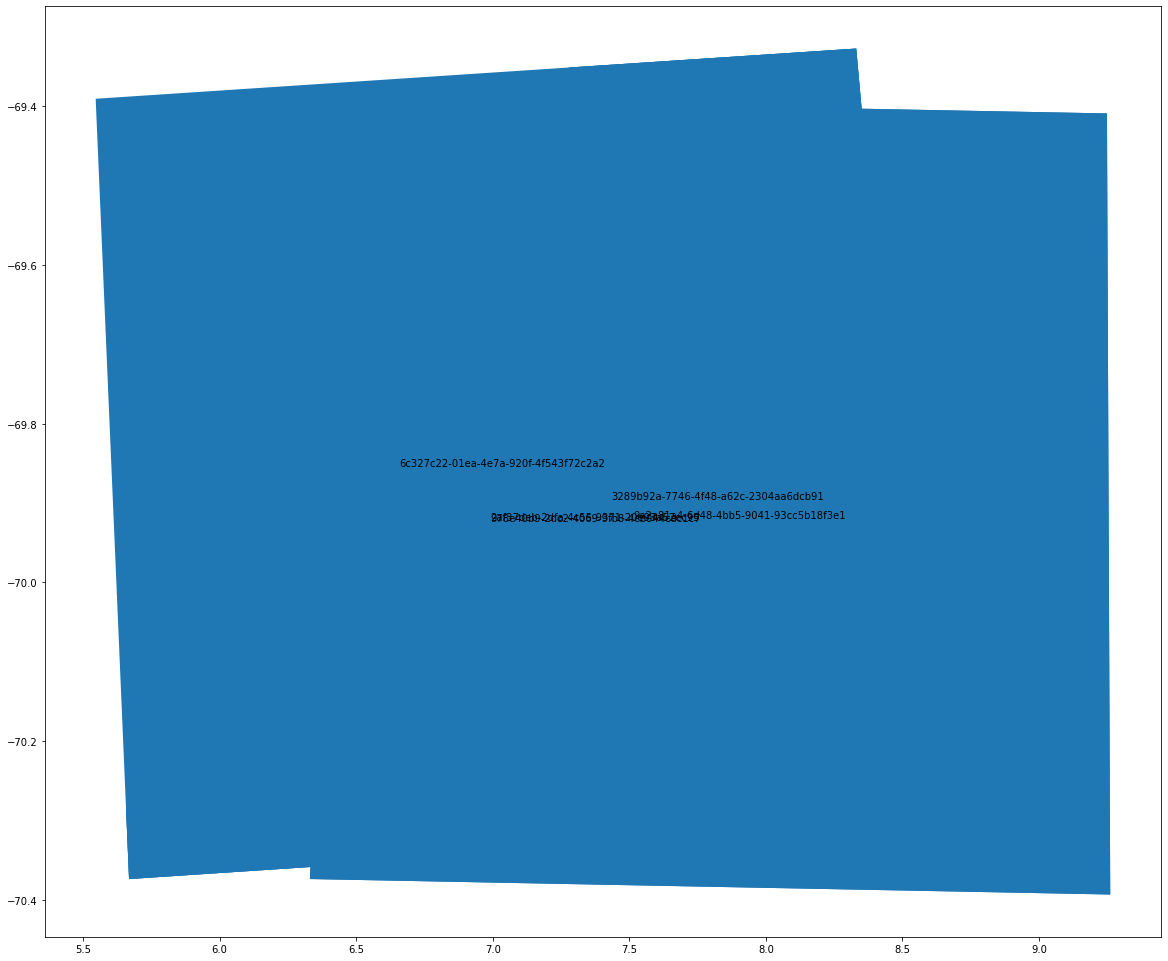

In [23]:
ax = areas.plot(figsize = (20,20))
areas.apply(lambda x: ax.annotate(text=x['uuid'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

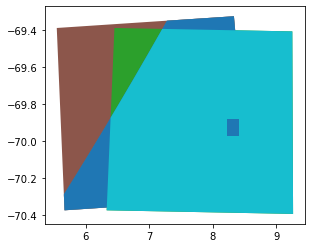

In [8]:
import matplotlib.pyplot as plt

gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [3]:
import folium
import geopandas as gpd
from geojson import Point, Feature, FeatureCollection, dump
from shapely.geometry import Point, Polygon
import pandas as pd
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
api = SentinelAPI('mbossing', 'Iaintdoin12','https://scihub.copernicus.eu/dhus')

data = [8.318,-69.948,'20191123','20191124','Astrid']

def collecting(x):
    
        xmin= x[0] - 0.014438
        ymin= x[1] - 0.014438
        xmax= x[0] + 0.014438
        ymax= x[1] + 0.014438
        features = []
        polygon = Polygon([[xmin,
                  ymin],
                  [xmin,
                  ymax],
                  [xmax,
                  ymax],
                  [xmin,
                  ymax],
                  [xmin,
                  ymin]])
        
        features.append(Feature(geometry=polygon, properties={"Area": "Atlis"}))
        feature_collection = FeatureCollection(features)
        
        with open('{}.geojson'.format(x[4]), 'w') as f:
           dump(feature_collection, f)
        
        boundsdata = r'C:\Users\mmbos\Class Materials\GGS-416\satellite-imagery-analysis\Project\{}.geojson'.format(x[4])
        
        footprint = geojson_to_wkt(read_geojson(boundsdata))
        
        products = api.query(footprint,
                     date = (x[2],x[3]),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20),
                     limit=5)
        
        api.download_all(products)

collecting(data)

MD5 checksumming:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.01G [00:00<?, ?B/s]